# GENOMIC DATASET

### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import gzip
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,precision_score,accuracy_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
## import the phenotype dataset

cl = pd.read_csv('miller2005_public_miller2005_public_clinicalMatrix.gz', compression='gzip',delimiter="\t", header=0 )
cl.head()

,sampleID,AgeAtDiagnosis,DLDAerror,DSS,DSS.time,ERstatus,EistonHistologicGrade,LymphNodeStatus,PgRstatus,TumorSize,_INTEGRATION,_PATIENT,p53DLDAclassResult,p53mutant,_GENOMIC_ID_miller2005
0,X100B08,68,No,AliveOrCensored,12.0,ER+,G1,LN-,PgR-,9.0,X100B08,X100B08,WT-like,p53-,X100B08
1,X101B88,40,No,AliveOrCensored,12.0,ER-,G3,LN-,PgR-,12.0,X101B88,X101B88,MT-like,p53+,X101B88
2,X102B06,51,No,AliveOrCensored,12.0,ER+,G3,LN-,PgR+,26.0,X102B06,X102B06,MT-like,p53+,X102B06
3,X103B41,52,Yes,NaN,NaN,ER-,G3,LN+,PgR-,22.0,X103B41,X103B41,MT-like,p53-,X103B41
4,X104B91,80,Yes,AliveOrCensored,4.0,ER+,G3,NaN,PgR+,24.0,X104B91,X104B91,WT-like,p53+,X104B91


In [3]:
cl.describe()

,AgeAtDiagnosis,DSS.time,TumorSize
count,251.000000,236.000000,251.000000
mean,62.111554,8.211864,22.428287
std,13.866056,3.857795,12.533053
min,28.000000,0.000000,2.000000
25%,52.000000,5.000000,15.000000
50%,64.000000,10.000000,20.000000
75%,72.000000,11.000000,25.625000
max,93.000000,13.000000,130.000000


In [4]:
cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sampleID                251 non-null    object 
 1   AgeAtDiagnosis          251 non-null    int64  
 2   DLDAerror               251 non-null    object 
 3   DSS                     236 non-null    object 
 4   DSS.time                236 non-null    float64
 5   ERstatus                247 non-null    object 
 6   EistonHistologicGrade   249 non-null    object 
 7   LymphNodeStatus         242 non-null    object 
 8   PgRstatus               251 non-null    object 
 9   TumorSize               251 non-null    float64
 10  _INTEGRATION            251 non-null    object 
 11  _PATIENT                251 non-null    object 
 12  p53DLDAclassResult      251 non-null    object 
 13  p53mutant               251 non-null    object 
 14  _GENOMIC_ID_miller2005  251 non-null    ob

<AxesSubplot:>

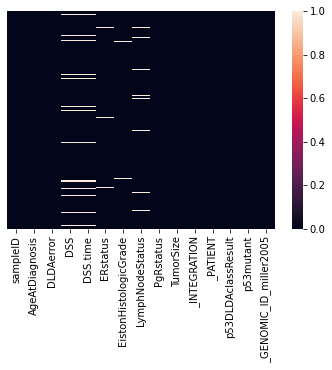

In [5]:
## There are evidence of missing values
## Heatmap to visualize the missing values

sns.heatmap(cl.isnull(),yticklabels=False)

In [6]:
## Getting the sum of missing values from each column

cl.isnull().sum()

sampleID                   0
AgeAtDiagnosis             0
DLDAerror                  0
DSS                       15
DSS.time                  15
ERstatus                   4
EistonHistologicGrade      2
LymphNodeStatus            9
PgRstatus                  0
TumorSize                  0
_INTEGRATION               0
_PATIENT                   0
p53DLDAclassResult         0
p53mutant                  0
_GENOMIC_ID_miller2005     0
dtype: int64

### Exploratory Analysis

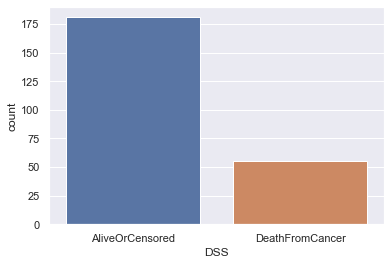

In [7]:
## Disease Specific survival

sns.set_theme(style="darkgrid")
ax = sns.countplot(x = cl.DSS)

## Imbalance dataset
## more instances of Alive than death
## Will check of sampling improves the models later

In [8]:
cl.DSS.value_counts()

AliveOrCensored    181
DeathFromCancer     55
Name: DSS, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

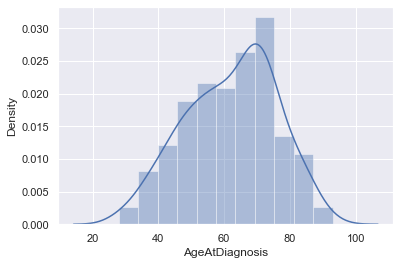

In [9]:
## Age

sns.distplot(cl['AgeAtDiagnosis'],hist=True)
plt.show

## majority of cases fall between 60 -80 
## minimum age of patient is 28 and the maximum is 93

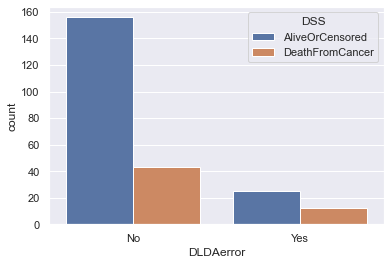

In [10]:
## DLDAerror

sns.set_theme(style="darkgrid")
ax = sns.countplot(x = cl.DLDAerror, hue = cl.DSS)

<function matplotlib.pyplot.show(close=None, block=None)>

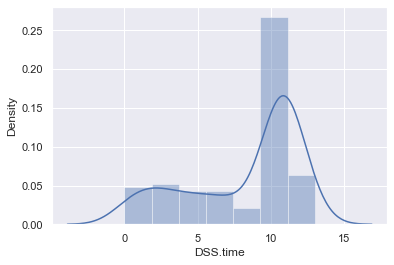

In [11]:
## Disease Specific survival

sns.distplot(cl['DSS.time'],hist=True)
plt.show

## Minimum survival time is 0 and max is 13

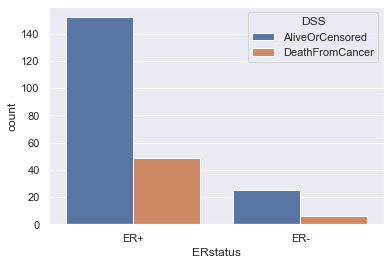

In [12]:
## ERstatus

sns.set_theme(style="darkgrid")
ax = sns.countplot(x = cl.ERstatus, hue = cl.DSS)

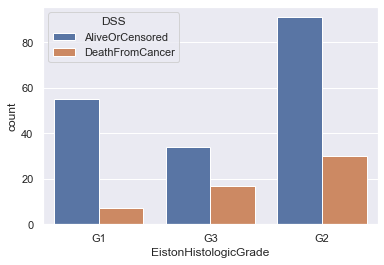

In [13]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x = cl.EistonHistologicGrade, hue = cl.DSS)

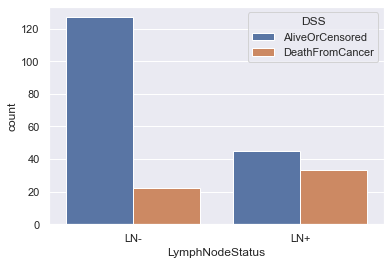

In [14]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x = cl.LymphNodeStatus, hue = cl.DSS)

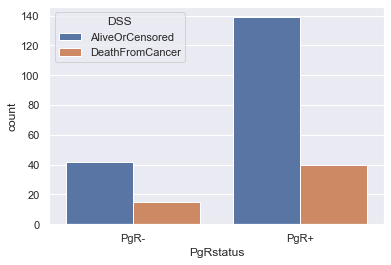

In [15]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x = cl.PgRstatus, hue = cl.DSS)

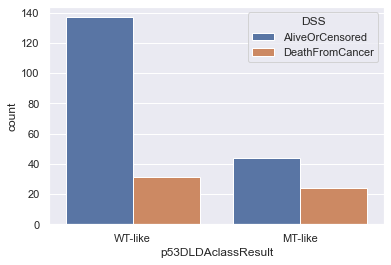

In [16]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x = cl.p53DLDAclassResult, hue = cl.DSS)

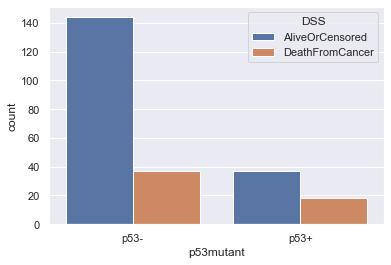

In [17]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x = cl.p53mutant, hue = cl.DSS)

<function matplotlib.pyplot.show(close=None, block=None)>

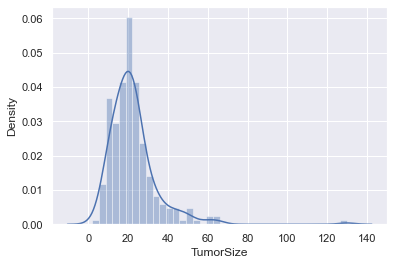

In [18]:
sns.distplot(cl['TumorSize'],hist=True)
plt.show

In [19]:
cl.columns

Index(['sampleID', 'AgeAtDiagnosis', 'DLDAerror', 'DSS', 'DSS.time',
       'ERstatus', 'EistonHistologicGrade', 'LymphNodeStatus', 'PgRstatus',
       'TumorSize', '_INTEGRATION', '_PATIENT', 'p53DLDAclassResult',
       'p53mutant', '_GENOMIC_ID_miller2005'],
      dtype='object')

In [20]:
## Group columns into categorical and numerical

cat = cl[["DSS","DLDAerror", "ERstatus", "EistonHistologicGrade", "LymphNodeStatus", "PgRstatus",
       "p53DLDAclassResult","p53mutant"]]

num = cl[["AgeAtDiagnosis", "DSS.time", "TumorSize"]]

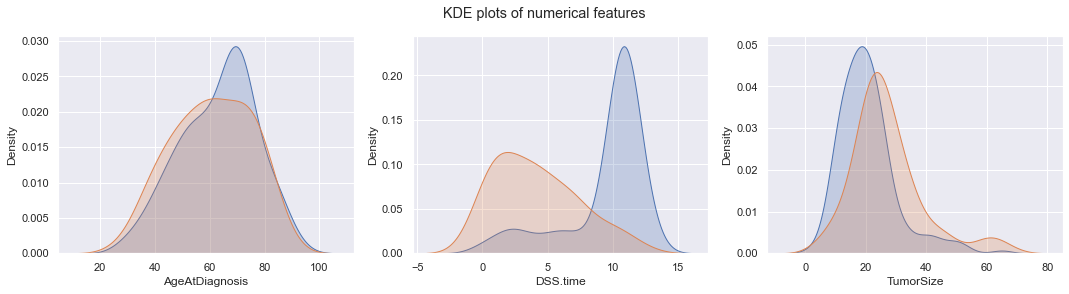

In [21]:
fig, axes = plt.subplots(ncols = 3, figsize = (18,4))
fig.subplots_adjust(hspace = 0.4, wspace = 0.2)
fig.suptitle("KDE plots of numerical features")

for ax, col in zip(axes.flatten(), num) :
    sns.kdeplot(cl[cl["DSS"] == 'AliveOrCensored'][col], shade="True", label="Alive", ax = ax)
    sns.kdeplot(cl[cl["DSS"] == 'DeathFromCancer'][col], shade="True", label="Dead", ax = ax)
    ax.set_xlabel(col)

In [22]:
cl.DSS.value_counts()

AliveOrCensored    181
DeathFromCancer     55
Name: DSS, dtype: int64

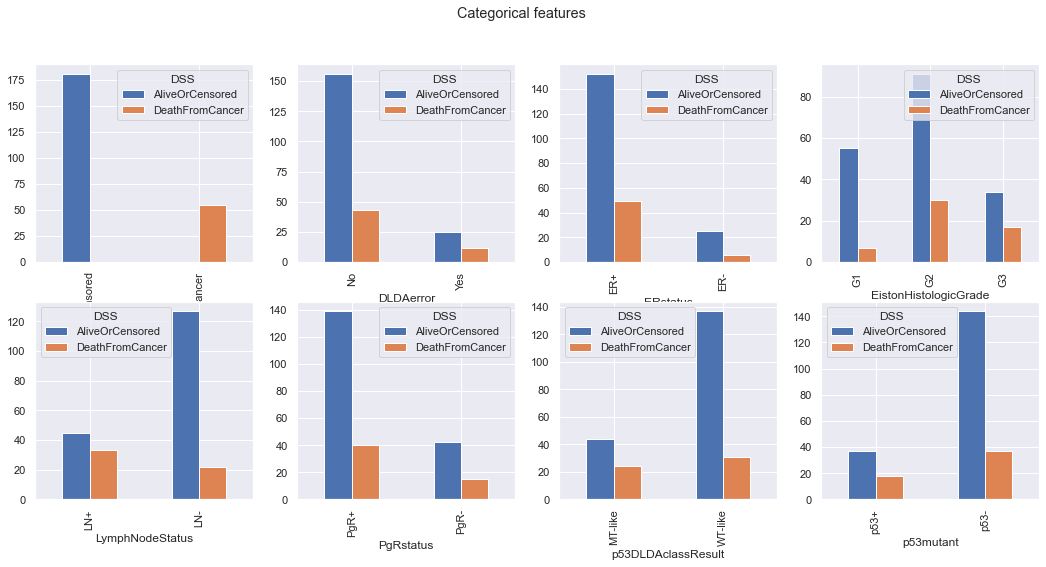

In [23]:
fig, axes = plt.subplots(ncols = 4, nrows = 2, figsize = (18,8))
#fig.subplots_adjust(hspace = 0.3, wspace = 0.3)
fig.suptitle("Categorical features")

for ax, col in zip(axes.flatten(), cat) :
    pd.crosstab(cl[col], cl["DSS"]).plot(kind="bar", ax = ax)
    ax.set_xlabel(col)

<AxesSubplot:xlabel='AgeAtDiagnosis', ylabel='TumorSize'>

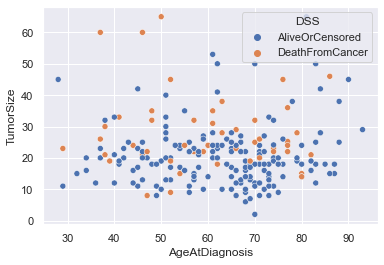

In [24]:
# scatter plot between AgeAtDiagnosis and survival time

sns.scatterplot(x='AgeAtDiagnosis', y='TumorSize', data=cl,hue='DSS')

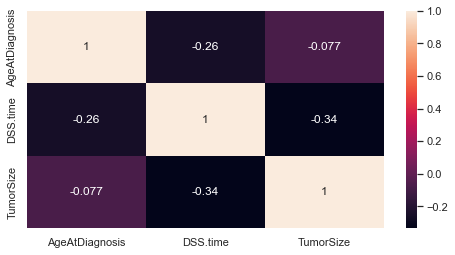

In [25]:
plt.figure(figsize=(8,4))
sns.heatmap(cl.corr(), annot=True)
plt.show()

## The variables are negatively correlated

## Genomic dataset

In [26]:
## importing the genomicMAtrix dataset

gene = pd.read_csv('miller2005_public_miller2005_genomicMatrix.gz', compression='gzip',delimiter="\t", header=0 )
gene.head()

,probe,X100B08,X101B88,X102B06,X103B41,X104B91,X105B13,X106B55,X10B88,X110B34,...,X85A03,X86A40,X87A79,X88A67,X8B87,X90A63,X94A16,X96A21,X99A50,X9B52
0,211050_x_at,-0.606098,-0.712117,-0.249024,0.473394,-0.549072,-0.309201,0.418973,-0.394657,-0.472516,...,0.194257,-0.014784,0.134075,-0.199902,0.118920,-0.379270,0.820076,-0.045577,-0.024553,0.270666
1,220399_at,0.297762,0.108554,0.529916,-0.023698,-0.240675,-0.186095,0.002805,-0.131806,0.113295,...,0.158997,0.228585,-1.618250,-0.237390,0.228423,-0.433717,-1.760925,0.290775,0.248707,-0.022792
2,202115_s_at,-0.020720,-0.329813,-0.455560,0.335867,0.091474,-0.064934,0.232192,-0.024533,0.390957,...,0.611860,0.303448,0.073593,-0.082835,0.133630,0.055395,0.071154,-0.114437,0.242833,0.218242
3,224501_at,0.019116,-0.508560,0.056202,-0.011279,0.189046,0.696562,0.192982,-0.319991,-0.243859,...,0.209864,0.215092,-0.323448,-0.020308,0.214315,0.212823,0.368002,0.207986,0.267993,0.791909
4,227347_x_at,0.217003,0.750269,0.469504,-0.182406,-0.472260,0.294003,0.147632,0.462857,0.781625,...,-0.792750,0.744523,0.156747,-0.060445,0.107039,-0.192824,0.030753,-0.463569,0.116094,-0.142529


In [27]:
gene.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24711 entries, 0 to 24710
Columns: 252 entries, probe to X9B52
dtypes: float64(251), object(1)
memory usage: 47.5+ MB


In [28]:
## transpose the dataset to have the features as columns

new_gene = gene.set_index('probe').T.rename_axis('sampleID').reset_index()
new_gene

probe,sampleID,211050_x_at,220399_at,202115_s_at,224501_at,227347_x_at,205483_s_at,212283_at,212285_s_at,217419_x_at,...,216922_x_at,208331_at,211461_at,232402_at,207647_at,207646_s_at,207916_at,202829_s_at,214950_at,208164_s_at
0,X100B08,-0.606098,0.297762,-0.020720,0.019116,0.217003,-0.959766,0.319060,0.267431,0.054625,...,0.585269,0.677886,0.294886,0.334739,-0.922423,0.525822,0.655930,-0.373383,0.533709,0.955100
1,X101B88,-0.712117,0.108554,-0.329813,-0.508560,0.750269,-0.739374,-0.635076,0.404148,0.553476,...,0.343490,-0.377170,-0.146836,-0.027103,0.108189,-0.108456,0.800626,0.047387,-0.630866,0.550008
2,X102B06,-0.249024,0.529916,-0.455560,0.056202,0.469504,0.436696,0.253222,0.236894,0.263844,...,-1.192292,-0.264924,-0.403073,-0.273291,0.408303,0.256424,0.052404,-0.076766,0.170939,-0.016254
3,X103B41,0.473394,-0.023698,0.335867,-0.011279,-0.182406,0.913891,0.134585,0.468412,0.508557,...,0.233813,-0.182134,-0.132613,0.314508,0.147834,-0.766659,-1.517961,0.487872,0.394624,0.440938
4,X104B91,-0.549072,-0.240675,0.091474,0.189046,-0.472260,1.184845,0.204097,0.397236,0.107320,...,-0.063716,-0.051118,-0.149773,-0.304061,-1.229899,-0.000545,0.574513,0.597032,0.196972,0.120323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,X90A63,-0.379270,-0.433717,0.055395,0.212823,-0.192824,0.971321,-0.620542,-0.300075,-0.227528,...,-0.206234,-0.513839,-0.401776,-0.095711,-0.100813,-1.245132,-1.202338,0.419989,0.774586,0.810731
247,X94A16,0.820076,-1.760925,0.071154,0.368002,0.030753,1.839521,-0.131311,-0.134719,-0.088519,...,0.158520,-0.533802,0.656851,-0.550142,1.029998,0.569329,-0.975293,-0.121131,0.291052,-0.603854
248,X96A21,-0.045577,0.290775,-0.114437,0.207986,-0.463569,-0.695891,-0.275499,-0.617247,-0.927063,...,-0.176975,0.228833,0.444697,0.008805,0.853332,-0.181494,0.375052,-0.038691,-0.111655,1.093266
249,X99A50,-0.024553,0.248707,0.242833,0.267993,0.116094,-1.021428,-0.333262,-0.003596,-0.020699,...,-1.343960,0.001666,0.222738,0.291546,0.130782,-1.347966,-0.827747,-0.286596,0.225008,0.760187


In [29]:
new_gene.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Columns: 24712 entries, sampleID to 208164_s_at
dtypes: float64(24711), object(1)
memory usage: 47.3+ MB


## Merge the two datasets

In [30]:
# Merge the DSS column to the genomics dataset
# Use the sampleID from booth datasets for the merging

dss = cl[['sampleID', 'DSS.time']]
dss

,sampleID,DSS.time
0,X100B08,12.0
1,X101B88,12.0
2,X102B06,12.0
3,X103B41,NaN
4,X104B91,4.0
...,...,...
246,X90A63,3.0
247,X94A16,NaN
248,X96A21,0.0
249,X99A50,11.0


In [31]:
# this is an inner join to retain only information that match from SampleID
merged =pd.merge(new_gene,dss, on='sampleID')
merged

,sampleID,211050_x_at,220399_at,202115_s_at,224501_at,227347_x_at,205483_s_at,212283_at,212285_s_at,217419_x_at,...,208331_at,211461_at,232402_at,207647_at,207646_s_at,207916_at,202829_s_at,214950_at,208164_s_at,DSS.time
0,X100B08,-0.606098,0.297762,-0.020720,0.019116,0.217003,-0.959766,0.319060,0.267431,0.054625,...,0.677886,0.294886,0.334739,-0.922423,0.525822,0.655930,-0.373383,0.533709,0.955100,12.0
1,X101B88,-0.712117,0.108554,-0.329813,-0.508560,0.750269,-0.739374,-0.635076,0.404148,0.553476,...,-0.377170,-0.146836,-0.027103,0.108189,-0.108456,0.800626,0.047387,-0.630866,0.550008,12.0
2,X102B06,-0.249024,0.529916,-0.455560,0.056202,0.469504,0.436696,0.253222,0.236894,0.263844,...,-0.264924,-0.403073,-0.273291,0.408303,0.256424,0.052404,-0.076766,0.170939,-0.016254,12.0
3,X103B41,0.473394,-0.023698,0.335867,-0.011279,-0.182406,0.913891,0.134585,0.468412,0.508557,...,-0.182134,-0.132613,0.314508,0.147834,-0.766659,-1.517961,0.487872,0.394624,0.440938,NaN
4,X104B91,-0.549072,-0.240675,0.091474,0.189046,-0.472260,1.184845,0.204097,0.397236,0.107320,...,-0.051118,-0.149773,-0.304061,-1.229899,-0.000545,0.574513,0.597032,0.196972,0.120323,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,X90A63,-0.379270,-0.433717,0.055395,0.212823,-0.192824,0.971321,-0.620542,-0.300075,-0.227528,...,-0.513839,-0.401776,-0.095711,-0.100813,-1.245132,-1.202338,0.419989,0.774586,0.810731,3.0
247,X94A16,0.820076,-1.760925,0.071154,0.368002,0.030753,1.839521,-0.131311,-0.134719,-0.088519,...,-0.533802,0.656851,-0.550142,1.029998,0.569329,-0.975293,-0.121131,0.291052,-0.603854,NaN
248,X96A21,-0.045577,0.290775,-0.114437,0.207986,-0.463569,-0.695891,-0.275499,-0.617247,-0.927063,...,0.228833,0.444697,0.008805,0.853332,-0.181494,0.375052,-0.038691,-0.111655,1.093266,0.0
249,X99A50,-0.024553,0.248707,0.242833,0.267993,0.116094,-1.021428,-0.333262,-0.003596,-0.020699,...,0.001666,0.222738,0.291546,0.130782,-1.347966,-0.827747,-0.286596,0.225008,0.760187,11.0


## Remove missing values

In [32]:
# missing values in the column (DSS)

merged = merged.dropna(axis=0)
merged

# 251 instances have dropped to 236 because of the rows eliminated

,sampleID,211050_x_at,220399_at,202115_s_at,224501_at,227347_x_at,205483_s_at,212283_at,212285_s_at,217419_x_at,...,208331_at,211461_at,232402_at,207647_at,207646_s_at,207916_at,202829_s_at,214950_at,208164_s_at,DSS.time
0,X100B08,-0.606098,0.297762,-0.020720,0.019116,0.217003,-0.959766,0.319060,0.267431,0.054625,...,0.677886,0.294886,0.334739,-0.922423,0.525822,0.655930,-0.373383,0.533709,0.955100,12.0
1,X101B88,-0.712117,0.108554,-0.329813,-0.508560,0.750269,-0.739374,-0.635076,0.404148,0.553476,...,-0.377170,-0.146836,-0.027103,0.108189,-0.108456,0.800626,0.047387,-0.630866,0.550008,12.0
2,X102B06,-0.249024,0.529916,-0.455560,0.056202,0.469504,0.436696,0.253222,0.236894,0.263844,...,-0.264924,-0.403073,-0.273291,0.408303,0.256424,0.052404,-0.076766,0.170939,-0.016254,12.0
4,X104B91,-0.549072,-0.240675,0.091474,0.189046,-0.472260,1.184845,0.204097,0.397236,0.107320,...,-0.051118,-0.149773,-0.304061,-1.229899,-0.000545,0.574513,0.597032,0.196972,0.120323,4.0
5,X105B13,-0.309201,-0.186095,-0.064934,0.696562,0.294003,-0.921591,-1.488587,0.476116,0.844849,...,-0.375298,-0.126434,-0.522002,-0.202992,0.404424,-1.473320,-0.123029,0.186654,0.001976,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,X8B87,0.118920,0.228423,0.133630,0.214315,0.107039,-0.714932,0.670275,0.127405,0.252069,...,0.433971,0.091438,0.422775,0.469442,0.212320,-1.030358,-0.218450,0.308364,0.787785,11.0
246,X90A63,-0.379270,-0.433717,0.055395,0.212823,-0.192824,0.971321,-0.620542,-0.300075,-0.227528,...,-0.513839,-0.401776,-0.095711,-0.100813,-1.245132,-1.202338,0.419989,0.774586,0.810731,3.0
248,X96A21,-0.045577,0.290775,-0.114437,0.207986,-0.463569,-0.695891,-0.275499,-0.617247,-0.927063,...,0.228833,0.444697,0.008805,0.853332,-0.181494,0.375052,-0.038691,-0.111655,1.093266,0.0
249,X99A50,-0.024553,0.248707,0.242833,0.267993,0.116094,-1.021428,-0.333262,-0.003596,-0.020699,...,0.001666,0.222738,0.291546,0.130782,-1.347966,-0.827747,-0.286596,0.225008,0.760187,11.0


In [33]:
## Add another column for High and low risk based on survival time
## Low risk if survival time is equal or greater than 8

merged["risk"] = np.where(merged["DSS.time"]>=8.0, 0, 1)
merged

,sampleID,211050_x_at,220399_at,202115_s_at,224501_at,227347_x_at,205483_s_at,212283_at,212285_s_at,217419_x_at,...,211461_at,232402_at,207647_at,207646_s_at,207916_at,202829_s_at,214950_at,208164_s_at,DSS.time,risk
0,X100B08,-0.606098,0.297762,-0.020720,0.019116,0.217003,-0.959766,0.319060,0.267431,0.054625,...,0.294886,0.334739,-0.922423,0.525822,0.655930,-0.373383,0.533709,0.955100,12.0,0
1,X101B88,-0.712117,0.108554,-0.329813,-0.508560,0.750269,-0.739374,-0.635076,0.404148,0.553476,...,-0.146836,-0.027103,0.108189,-0.108456,0.800626,0.047387,-0.630866,0.550008,12.0,0
2,X102B06,-0.249024,0.529916,-0.455560,0.056202,0.469504,0.436696,0.253222,0.236894,0.263844,...,-0.403073,-0.273291,0.408303,0.256424,0.052404,-0.076766,0.170939,-0.016254,12.0,0
4,X104B91,-0.549072,-0.240675,0.091474,0.189046,-0.472260,1.184845,0.204097,0.397236,0.107320,...,-0.149773,-0.304061,-1.229899,-0.000545,0.574513,0.597032,0.196972,0.120323,4.0,1
5,X105B13,-0.309201,-0.186095,-0.064934,0.696562,0.294003,-0.921591,-1.488587,0.476116,0.844849,...,-0.126434,-0.522002,-0.202992,0.404424,-1.473320,-0.123029,0.186654,0.001976,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,X8B87,0.118920,0.228423,0.133630,0.214315,0.107039,-0.714932,0.670275,0.127405,0.252069,...,0.091438,0.422775,0.469442,0.212320,-1.030358,-0.218450,0.308364,0.787785,11.0,0
246,X90A63,-0.379270,-0.433717,0.055395,0.212823,-0.192824,0.971321,-0.620542,-0.300075,-0.227528,...,-0.401776,-0.095711,-0.100813,-1.245132,-1.202338,0.419989,0.774586,0.810731,3.0,1
248,X96A21,-0.045577,0.290775,-0.114437,0.207986,-0.463569,-0.695891,-0.275499,-0.617247,-0.927063,...,0.444697,0.008805,0.853332,-0.181494,0.375052,-0.038691,-0.111655,1.093266,0.0,1
249,X99A50,-0.024553,0.248707,0.242833,0.267993,0.116094,-1.021428,-0.333262,-0.003596,-0.020699,...,0.222738,0.291546,0.130782,-1.347966,-0.827747,-0.286596,0.225008,0.760187,11.0,0


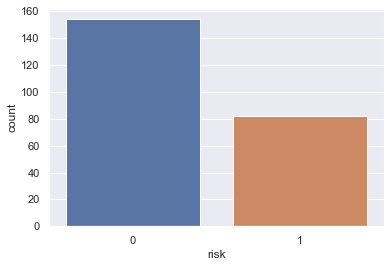

In [34]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x = merged.risk)

## SPLITTING INTO TRAIN AND TEST SETS

In [35]:
## took DSS.time out of the features 
## because it gives the same relevant information as risk

X = merged.drop(["sampleID", "risk", "DSS.time"], axis=1)
y = merged["risk"]

# 70% training 30% testing

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

## Pipelines

In [36]:
from sklearn.pipeline import Pipeline

## baseline models

knn_pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ]
)
svc_pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('svc', SVC(probability=True))
    ]
)
grad_pipe= Pipeline(
    [
        ('scaler', StandardScaler()),
        ('grad', GradientBoostingClassifier())
    ]
)

In [37]:
# list  and dictionary of pipelines for easy reference

pipelines = [knn_pipe, svc_pipe,grad_pipe]
pipe_dict = {0: 'KNN', 1:'SVC', 2:'Gradient'}

In [38]:
## fit models

for pipe in pipelines:
    pipe.fit(X_train, y_train)
    
for i, model in enumerate(pipelines):
    print("{} Accuracy: {:.3f}".format(pipe_dict[i],model.score(X_test,y_test)))
    


KNN Accuracy: 0.620
SVC Accuracy: 0.535
Gradient Accuracy: 0.563


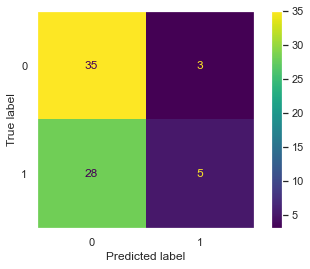

In [39]:
# check confusion matrix of best accuracy
plot_confusion_matrix(pipelines[2], X_test, y_test, display_labels=["0", "1"])
plt.show
plt.grid(False)

# feature importance

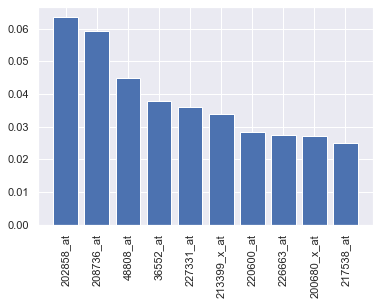

In [40]:
## plot feature importance

feature_names = X.columns
feature_importances = pipelines[2][1].feature_importances_
sorted_index = np.argsort(feature_importances)[::-1]
x = range(len(feature_importances[1:11]))

labels = np.array(feature_names)[sorted_index][1:11]
plt.bar(x, feature_importances[sorted_index][1:11], tick_label=labels)
plt.xticks(rotation=90)
plt.show()

# LDA

In [41]:
## Apply LDA to all models

## LDA with models

knn1_pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('lda', LDA(n_components=1)),
        ('knn', KNeighborsClassifier())
    ]
)
svc1_pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('lda', LDA(n_components=1)),
        ('svc', SVC(probability=True))
    ]
)
grad1_pipe= Pipeline(
    [
        ('scaler', StandardScaler()),
        ('lda', LDA(n_components=1)),
        ('grad', GradientBoostingClassifier())
    ]
)

In [42]:
# list  and dictionary of pipelines for easy reference

pipelines1 = [knn1_pipe, svc1_pipe,grad1_pipe]
pipe_dict1 = {0: 'KNN', 1:'SVC', 2:'Gradient'}

In [43]:
## fit models

for pipe1 in pipelines1:
    pipe1.fit(X_train, y_train)
    
for i, model1 in enumerate(pipelines1):
    print("{} Accuracy: {:.3f}".format(pipe_dict1[i],model1.score(X_test,y_test)))

KNN Accuracy: 0.521
SVC Accuracy: 0.620
Gradient Accuracy: 0.563


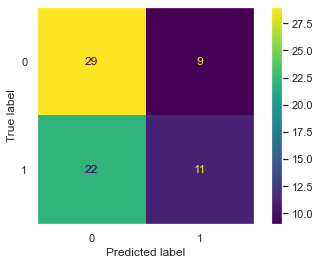

In [44]:
plot_confusion_matrix(pipelines1[2], X_test, y_test, display_labels=["0", "1"])
plt.show
plt.grid(False)

# Roc_Auc (baseline)

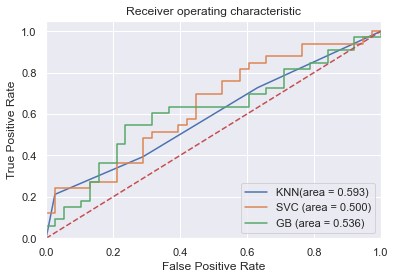

In [45]:
knn_pred = pipelines[0].predict(X_test)
svc_pred = pipelines[1].predict(X_test)
grad_pred = pipelines[2].predict(X_test)

knn_roc_auc = roc_auc_score(y_test, knn_pred)
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, pipelines[0].predict_proba(X_test)[:,1])
svc_roc_auc = roc_auc_score(y_test, svc_pred)
svc_fpr, svc_tpr, thresholds = roc_curve(y_test, pipelines[1].predict_proba(X_test)[:,1])
grad_roc_auc = roc_auc_score(y_test, grad_pred)
grad_fpr, grad_tpr, thresholds = roc_curve(y_test, pipelines[2].predict_proba(X_test)[:,1])
plt.figure()
plt.plot(knn_fpr, knn_tpr, label='KNN(area = %0.3f)' % knn_roc_auc)
plt.plot(svc_fpr, svc_tpr, label='SVC (area = %0.3f)' % svc_roc_auc)
plt.plot(grad_fpr, grad_tpr, label='GB (area = %0.3f)' % grad_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Roc_Auc (LDA)

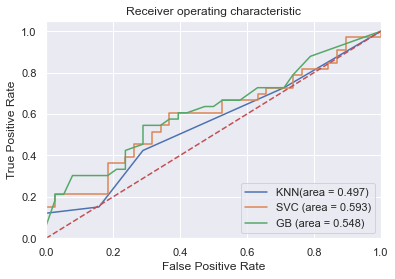

In [46]:
k2_pred = pipelines1[0].predict(X_test)
s2_pred = pipelines1[1].predict(X_test)
g2_pred = pipelines1[2].predict(X_test)

k2_roc_auc = roc_auc_score(y_test, k2_pred)
k2_fpr, k2_tpr, thresholds = roc_curve(y_test, pipelines1[0].predict_proba(X_test)[:,1])
s2_roc_auc = roc_auc_score(y_test, s2_pred)
s2_fpr, s2_tpr, thresholds = roc_curve(y_test, pipelines1[1].predict_proba(X_test)[:,1])
g2_roc_auc = roc_auc_score(y_test, g2_pred)
g2_fpr, g2_tpr, thresholds = roc_curve(y_test, pipelines1[2].predict_proba(X_test)[:,1])
plt.figure()
plt.plot(k2_fpr, k2_tpr, label='KNN(area = %0.3f)' % k2_roc_auc)
plt.plot(s2_fpr, s2_tpr, label='SVC (area = %0.3f)' % s2_roc_auc)
plt.plot(g2_fpr, g2_tpr, label='GB (area = %0.3f)' % g2_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()